In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [17]:
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_style("ticks")


In [3]:
results_folder_path = 'results'

short_files = [
'20230307174948-20c2',
'20230307175027-69e8',
'20230307175114-487a',
'20230307175152-eb8d',
'20230307175228-80b0',
]

medium_files = [
'20230307175822-58a7',
'20230307175336-e882',
'20230307181306-5a86',
'20230307181704-2389',
'20230307182058-8093',
]

long_files = [
'20230307183533-3bc6',
'20230307182542-1d53',
'20230307184511-929c',
'20230307185534-68a2',
'20230307190547-5385'
]

In [4]:
def read_monitoring(file,type):
    df = pd.read_csv(f'{results_folder_path}/{file}/monitoring.csv')
    df['EXP_ID'] = file
    df['Requests'] = type
    exp_df = pd.read_csv(f'{results_folder_path}/{file}/experiment_df.csv')
    start = exp_df['START'].iloc[0]
    end = exp_df['END'].iloc[0]
    df = df[df['ts'] >= start]
    df = df[df['ts'] <= end]
    dfs.append(df)

In [5]:
dfs = []
for file in short_files:
   read_monitoring(file,'100')
    
short_dfs = pd.concat(dfs)
short_dfs

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
3,3,24.3,1.678208e+09,33.535952,20230307174948-20c2,100
4,4,15.8,1.678208e+09,33.539902,20230307174948-20c2,100
5,5,15.7,1.678208e+09,33.546861,20230307174948-20c2,100
6,6,14.8,1.678208e+09,33.457898,20230307174948-20c2,100
7,7,14.6,1.678208e+09,33.505535,20230307174948-20c2,100
...,...,...,...,...,...,...
19,19,14.2,1.678208e+09,33.673970,20230307175228-80b0,100
20,20,15.9,1.678208e+09,33.732492,20230307175228-80b0,100
21,21,15.4,1.678208e+09,33.746312,20230307175228-80b0,100
22,22,14.5,1.678208e+09,33.777132,20230307175228-80b0,100


In [6]:
dfs = []
for file in medium_files:
   read_monitoring(file,'1000')
    
medium_dfs = pd.concat(dfs)
medium_dfs

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
2,2,17.7,1.678208e+09,33.668956,20230307175822-58a7,1000
3,3,17.3,1.678208e+09,33.713510,20230307175822-58a7,1000
4,4,15.4,1.678208e+09,33.689869,20230307175822-58a7,1000
5,5,14.9,1.678208e+09,33.722659,20230307175822-58a7,1000
6,6,14.2,1.678208e+09,33.719833,20230307175822-58a7,1000
...,...,...,...,...,...,...
206,206,15.0,1.678210e+09,35.936026,20230307182058-8093,1000
207,207,14.8,1.678210e+09,35.888414,20230307182058-8093,1000
208,208,14.7,1.678210e+09,35.929214,20230307182058-8093,1000
209,209,14.5,1.678210e+09,35.900791,20230307182058-8093,1000


In [7]:
dfs = []
for file in long_files:
   read_monitoring(file,'2500')
    
long_dfs = pd.concat(dfs)
long_dfs

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
2,2,16.2,1.678211e+09,33.674435,20230307183533-3bc6,2500
3,3,14.9,1.678211e+09,33.668650,20230307183533-3bc6,2500
4,4,15.6,1.678211e+09,33.698051,20230307183533-3bc6,2500
5,5,19.3,1.678211e+09,33.790989,20230307183533-3bc6,2500
6,6,15.3,1.678211e+09,33.831654,20230307183533-3bc6,2500
...,...,...,...,...,...,...
522,522,15.0,1.678213e+09,38.871516,20230307190547-5385,2500
523,523,15.1,1.678213e+09,38.864789,20230307190547-5385,2500
524,524,15.0,1.678213e+09,38.862086,20230307190547-5385,2500
525,525,14.7,1.678213e+09,38.846517,20230307190547-5385,2500


In [8]:
all_dfs = pd.concat([short_dfs, medium_dfs, long_dfs])
all_dfs

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
3,3,24.3,1.678208e+09,33.535952,20230307174948-20c2,100
4,4,15.8,1.678208e+09,33.539902,20230307174948-20c2,100
5,5,15.7,1.678208e+09,33.546861,20230307174948-20c2,100
6,6,14.8,1.678208e+09,33.457898,20230307174948-20c2,100
7,7,14.6,1.678208e+09,33.505535,20230307174948-20c2,100
...,...,...,...,...,...,...
522,522,15.0,1.678213e+09,38.871516,20230307190547-5385,2500
523,523,15.1,1.678213e+09,38.864789,20230307190547-5385,2500
524,524,15.0,1.678213e+09,38.862086,20230307190547-5385,2500
525,525,14.7,1.678213e+09,38.846517,20230307190547-5385,2500


In [9]:
baseline = pd.read_csv(f'{results_folder_path}/baseline/monitoring.csv')
mean_baseline_cpu = baseline['cpu'].mean()
mean_baseline_memory = baseline['memory'].mean()

mean_baseline_cpu, mean_baseline_memory

(9.298, 33.156609557564984)

In [10]:
# all_dfs['cpu'] -= mean_baseline_cpu
all_dfs['memory'] -= mean_baseline_memory
all_dfs['memory'] *= 32
all_dfs['memory'] /= 100
all_dfs

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
3,3,24.3,1.678208e+09,0.121389,20230307174948-20c2,100
4,4,15.8,1.678208e+09,0.122654,20230307174948-20c2,100
5,5,15.7,1.678208e+09,0.124880,20230307174948-20c2,100
6,6,14.8,1.678208e+09,0.096412,20230307174948-20c2,100
7,7,14.6,1.678208e+09,0.111656,20230307174948-20c2,100
...,...,...,...,...,...,...
522,522,15.0,1.678213e+09,1.828770,20230307190547-5385,2500
523,523,15.1,1.678213e+09,1.826617,20230307190547-5385,2500
524,524,15.0,1.678213e+09,1.825753,20230307190547-5385,2500
525,525,14.7,1.678213e+09,1.820770,20230307190547-5385,2500


In [11]:
short_dfs['memory'] -= mean_baseline_memory
short_dfs['memory'] *= 32
short_dfs['memory'] /= 100
short_dfs

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
3,3,24.3,1.678208e+09,0.121389,20230307174948-20c2,100
4,4,15.8,1.678208e+09,0.122654,20230307174948-20c2,100
5,5,15.7,1.678208e+09,0.124880,20230307174948-20c2,100
6,6,14.8,1.678208e+09,0.096412,20230307174948-20c2,100
7,7,14.6,1.678208e+09,0.111656,20230307174948-20c2,100
...,...,...,...,...,...,...
19,19,14.2,1.678208e+09,0.165555,20230307175228-80b0,100
20,20,15.9,1.678208e+09,0.184282,20230307175228-80b0,100
21,21,15.4,1.678208e+09,0.188705,20230307175228-80b0,100
22,22,14.5,1.678208e+09,0.198567,20230307175228-80b0,100


In [12]:
medium_dfs['memory'] -= mean_baseline_memory
medium_dfs['memory'] *= 32
medium_dfs['memory'] /= 100
medium_dfs

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
2,2,17.7,1.678208e+09,0.163951,20230307175822-58a7,1000
3,3,17.3,1.678208e+09,0.178208,20230307175822-58a7,1000
4,4,15.4,1.678208e+09,0.170643,20230307175822-58a7,1000
5,5,14.9,1.678208e+09,0.181136,20230307175822-58a7,1000
6,6,14.2,1.678208e+09,0.180232,20230307175822-58a7,1000
...,...,...,...,...,...,...
206,206,15.0,1.678210e+09,0.889413,20230307182058-8093,1000
207,207,14.8,1.678210e+09,0.874177,20230307182058-8093,1000
208,208,14.7,1.678210e+09,0.887233,20230307182058-8093,1000
209,209,14.5,1.678210e+09,0.878138,20230307182058-8093,1000


In [13]:
long_dfs['memory'] -= mean_baseline_memory
long_dfs['memory'] *= 32
long_dfs['memory'] /= 100
long_dfs

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
2,2,16.2,1.678211e+09,0.165704,20230307183533-3bc6,2500
3,3,14.9,1.678211e+09,0.163853,20230307183533-3bc6,2500
4,4,15.6,1.678211e+09,0.173261,20230307183533-3bc6,2500
5,5,19.3,1.678211e+09,0.203001,20230307183533-3bc6,2500
6,6,15.3,1.678211e+09,0.216014,20230307183533-3bc6,2500
...,...,...,...,...,...,...
522,522,15.0,1.678213e+09,1.828770,20230307190547-5385,2500
523,523,15.1,1.678213e+09,1.826617,20230307190547-5385,2500
524,524,15.0,1.678213e+09,1.825753,20230307190547-5385,2500
525,525,14.7,1.678213e+09,1.820770,20230307190547-5385,2500


(0.0, 50.0)

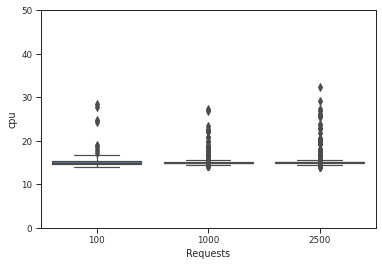

In [14]:
g = sns.boxplot(data=all_dfs,x='Requests',y='cpu')
g.set_ylim(0, 50)

Text(0, 0.5, 'Memory Usage in Gigabyte')

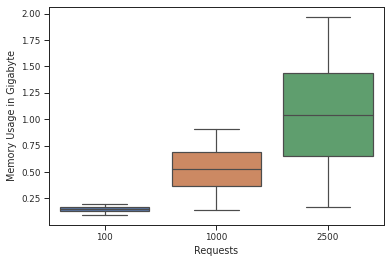

In [15]:
g = sns.boxplot(data=all_dfs,x='Requests',y='memory')
g.set_ylabel('Memory Usage in Gigabyte')

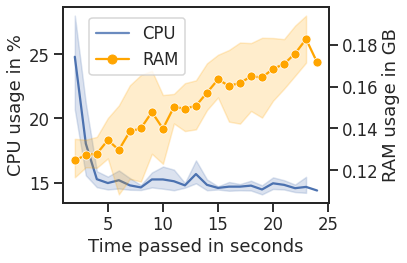

In [34]:
fig, ax1 = plt.subplots()
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
ax2 = ax1.twinx() 
g = sns.lineplot(x=short_dfs.index,y='cpu',data=short_dfs,ax=ax1)
g.set_ylabel('CPU usage in %')
g.set_xlabel('Time passed in seconds')
g = sns.lineplot(x=short_dfs.index,y='memory',data=short_dfs,ax=ax2, color='orange', marker='o')
g.set_ylabel('RAM usage in GB')
g.set_xlabel('Time passed in seconds')
g.legend(handles=[Line2D([], [], color='#6b8bbf', label='CPU'), Line2D([], [], marker='o', color='orange', label='RAM')], loc=(0.1,0.65))
plt.tight_layout()
plt.savefig('short-usage.pdf')

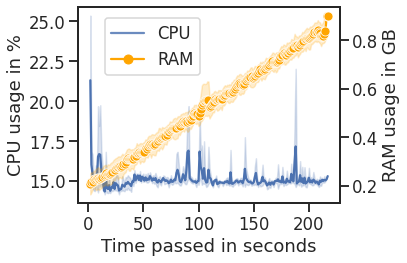

In [32]:
fig, ax1 = plt.subplots()
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
ax2 = ax1.twinx() 
dfs = medium_dfs

g = sns.lineplot(x=dfs.index,y='cpu',data=dfs,ax=ax1)
g.set_ylabel('CPU usage in %')
g.set_xlabel('Time passed in seconds')
g = sns.lineplot(x=dfs.index,y='memory',data=dfs,ax=ax2, color='orange', marker='o')
g.set_ylabel('RAM usage in GB')

g.legend(handles=[Line2D([], [], color='#6b8bbf', label='CPU'), Line2D([], [], marker='o', color='orange', label='RAM')],  loc=(0.1,0.65))
plt.tight_layout()
plt.savefig('medium-usage.pdf')

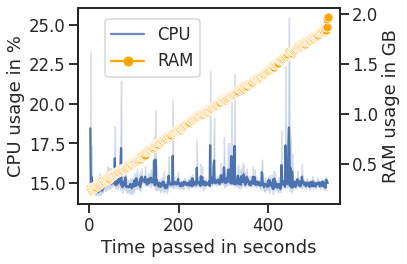

In [33]:
fig, ax1 = plt.subplots()
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
ax2 = ax1.twinx() 
dfs = long_dfs

g = sns.lineplot(x=dfs.index,y='cpu',data=dfs,ax=ax1)
g.set_ylabel('CPU usage in %')
g.set_xlabel('Time passed in seconds')
g = sns.lineplot(x=dfs.index,y='memory',data=dfs,ax=ax2, color='orange', marker='o')
g.set_ylabel('RAM usage in GB')

g.legend(handles=[Line2D([], [], color='#6b8bbf', label='CPU'), Line2D([], [], marker='o', color='orange', label='RAM')],  loc=(0.1,0.65))
plt.tight_layout()
plt.savefig('long-usage.pdf')

# No Log

In [35]:
baseline = pd.read_csv(f'{results_folder_path}/baseline2/monitoring.csv')
mean_baseline_cpu = baseline['cpu'].mean()
mean_baseline_memory = baseline['memory'].mean()

mean_baseline_cpu, mean_baseline_memory

(9.075, 31.610522734689624)

In [36]:
def read_monitoring_no_log(file,type):
    df = pd.read_csv(f'{results_folder_path}/{file}/monitoring.csv')
    df['EXP_ID'] = file
    df['Requests'] = type
    return df

In [40]:
dfs = []
dfs.append(read_monitoring_no_log('nolog1', '2500'))
dfs.append(read_monitoring_no_log('nolog2', '2500'))
dfs.append(read_monitoring_no_log('nolog3', '2500'))
df = pd.concat(dfs)
df

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
0,0,17.8,1.678220e+09,32.147489,nolog1,2500
1,1,22.9,1.678220e+09,32.355489,nolog1,2500
2,2,16.1,1.678220e+09,32.327029,nolog1,2500
3,3,15.4,1.678220e+09,32.318138,nolog1,2500
4,4,14.7,1.678220e+09,32.318847,nolog1,2500
...,...,...,...,...,...,...
519,519,14.4,1.678222e+09,32.943812,nolog3,2500
520,520,14.6,1.678222e+09,32.956410,nolog3,2500
521,521,14.9,1.678222e+09,32.379827,nolog3,2500
522,522,7.3,1.678222e+09,32.021432,nolog3,2500


In [42]:
df['memory'] -= mean_baseline_memory
df['memory'] *= 32
df['memory'] /= 100
df

,Unnamed: 0,cpu,ts,memory,EXP_ID,Requests
0,0,17.8,1.678220e+09,0.171829,nolog1,2500
1,1,22.9,1.678220e+09,0.238389,nolog1,2500
2,2,16.1,1.678220e+09,0.229282,nolog1,2500
3,3,15.4,1.678220e+09,0.226437,nolog1,2500
4,4,14.7,1.678220e+09,0.226664,nolog1,2500
...,...,...,...,...,...,...
519,519,14.4,1.678222e+09,0.426653,nolog3,2500
520,520,14.6,1.678222e+09,0.430684,nolog3,2500
521,521,14.9,1.678222e+09,0.246177,nolog3,2500
522,522,7.3,1.678222e+09,0.131491,nolog3,2500


In [45]:
# because no metadata files were created we manually cut out the parts in which the simulation did not run
df = df[df.index < 510]

In [43]:
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_style("ticks")


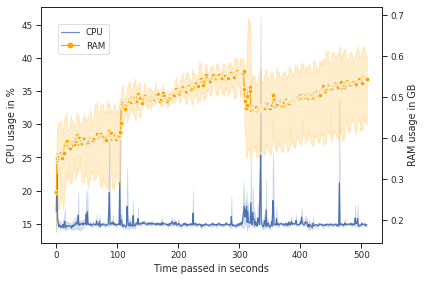

In [46]:
fig, ax1 = plt.subplots()
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
ax2 = ax1.twinx() 
dfs = df

g = sns.lineplot(x=dfs.index,y='cpu',data=dfs,ax=ax1)
g.set_ylabel('CPU usage in %')
g.set_xlabel('Time passed in seconds')
g = sns.lineplot(x=dfs.index,y='memory',data=dfs,ax=ax2, color='orange', marker='o')
g.set_ylabel('RAM usage in GB')

g.legend(handles=[Line2D([], [], color='#6b8bbf', label='CPU'), Line2D([], [], marker='o', color='orange', label='RAM')],  loc=(0.05,0.8))
plt.tight_layout()
plt.savefig('long-usage-no-log.pdf')